In [405]:
import pandas as pd
import numpy as np
from scipy import optimize as opt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/sebastian/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [406]:
sff = pd.DataFrame.from_csv('sff.csv')

In [407]:
sff

,0,1,2,3,4
1-Rb87,0.111111,0.277778,0.277778,0.000000,0
2-Rb87,0.000000,0.055556,0.277778,0.777778,0
2-Rb85,0.000000,0.330000,0.432099,0.345679,0
3-Rb85,0.000000,0.000000,0.123457,0.432099,1


In [408]:
freq = pd.DataFrame.from_csv('freq.csv')

In [409]:
freq

,Rb85-S,Rb85-P,Rb87-S,Rb87-P
0,NaN,NaN,NaN,-302.074
1,NaN,-113.2,4271.677,-229.852
2,1770.843,-83.8,-2536.005,-72.911
3,-1264.889,-20.5,NaN,193.741
4,NaN,100.2,NaN,NaN


In [410]:
d_line_87 = 384.2304844e6

In [411]:
d_line_85 = 384.2304064e6

## Transition frequencies for hyperfine levels

### Rb85

In [412]:
frequencies_85 = np.zeros(8).reshape(2,4)
for i in range(2):
    for j in range(i,i+3):
        frequencies_85[i,j] = d_line_85 + freq['Rb85-S'][2+i] + freq['Rb85-P'][1+j]
        
frequencies_85   
df_freq_85 = pd.DataFrame(frequencies_85,columns=['1','2','3','4'],index = ['2','3'])
df_freq_85

,1,2,3,4
2,3.842321e+08,3.842321e+08,3.842322e+08,0.000000e+00
3,0.000000e+00,3.842291e+08,3.842291e+08,3.842292e+08


### Rb87

In [413]:
frequencies_87 = np.zeros(8).reshape(2,4)
for i in range(2):
    for j in range(i,i+3):
        frequencies_87[i,j] = d_line_87 + freq['Rb87-S'][1+i]  + freq['Rb87-P'][j]
        
frequencies_87   
df_freq_87 = pd.DataFrame(frequencies_87,columns=['0','1','2','3'],index = ['1','2'])
df_freq_87

,0,1,2,3
1,3.842345e+08,3.842345e+08,3.842347e+08,0.000000e+00
2,0.000000e+00,3.842277e+08,3.842279e+08,3.842281e+08


## Overlap lines

In [414]:
def gauss(x, N, mu, sig):
    return N*np.exp(-((x-mu)/sig)**2)

def two_gauss(x,N1,N2,mu1,mu2,sig1,sig2):
    return gauss(x,N1,mu1,sig1)+ gauss(x,N2,mu2,sig2)



### Rb85

In [415]:
kb = 1.38065e-23
c =  299792558
T = 295.15
M_85 = 1.409993e-25

In [416]:
sigma_85 = np.array(np.sqrt(kb*T/(M_85*(c**2)))*df_freq_85).flatten()
mu_85 = np.array(df_freq_85 - df_freq_85['1'][0]).flatten()
N_85 = np.array(sff[2:4])[:,1:5].flatten()
np.array(df_freq_85).flatten()


array([ 0.33      ,  0.43209877,  0.34567901,  0.        ,  0.        ,
        0.12345679,  0.43209877,  1.        ])

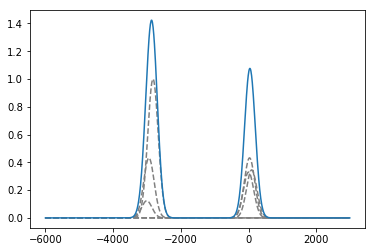

In [418]:
x= np.arange(-6000,3000,10)
y= np.zeros(len(x))
y_gauss = []
for i in range(8):
    if(sigma[i] != 0):
        y += gauss(x,N_85[i],mu_85[i],sigma_85[i])
        plot(x,gauss(x,N_85[i],mu_85[i],sigma_85[i]),color = 'grey',ls = '--')
        y_gauss.append(gauss(x,N_85[i],mu_85[i],sigma_85[i]))
    else:
        y_gauss.append(np.zeros(len(x)))
        
par_85, cov = opt.curve_fit(two_gauss,x,y,[1,1,-3000,0,217,217])
plot(x,y)


In [419]:
gap_85 = par_85[3]-par_85[2]

In [420]:
rb85_f2_width = par_85[5]
rb85_f2_width

224.2814303011981

In [421]:
gap_85

2908.2579090305871

### Rb 87

In [422]:
M_87 = 1.44316077e-25

In [423]:
sigma = np.array(np.sqrt(kb*T/(M_87*(c**2)))*df_freq_87).flatten()
mu = np.array(df_freq_87 - df_freq_85['1'][0]).flatten()
N = np.array(sff[0:2])[:,0:4].flatten()

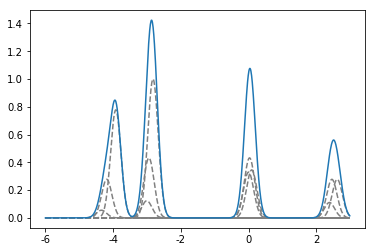

In [436]:
figsize(6,4)
x= np.arange(-6000,3000,10)
y_87= np.zeros(len(x))
for i,y_g in zip(range(8),y_gauss):
    if(sigma[i] != 0):
        y_87 += gauss(x,N[i],mu[i],sigma[i])
        plot(x,gauss(x,N[i],mu[i],sigma[i]),color = 'grey',ls = '--')
        plot(x,y_g, color = 'grey',ls = '--')



plot(x,y_87+y)

xticks(np.arange(-6000,3000,2000),np.arange(-6,3,2))

par_87, cov = opt.curve_fit(two_gauss,x,y_87,[.7,1,-4000,2000,217,217])
scale_85 = 0.057517/par_85[0]
scale_87 = 	0.024994/par_87[0]

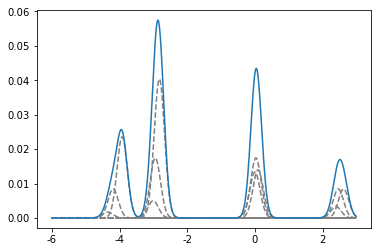

In [437]:
figsize(6,4)
x= np.arange(-6000,3000,10)
y_87= np.zeros(len(x))
for i,y_g in zip(range(8),y_gauss):
    if(sigma[i] != 0):
        y_87 += gauss(x,N[i],mu[i],sigma[i])
        plot(x,scale_87*gauss(x,N[i],mu[i],sigma[i]),color = 'grey',ls = '--')
        plot(x,y_g*scale_85, color = 'grey',ls = '--')

scale_85 = 0.057517/par_85[0]
scale_87 = 	0.024994/par_87[0]

plot(x,y_87*scale_87+y*scale_85)

xticks(np.arange(-6000,3000,2000),np.arange(-6,3,2))

par_87, cov = opt.curve_fit(two_gauss,x,y_87,[.7,1,-4000,2000,217,217])

In [425]:
figsize(9,7)


gap_87 = par_87[3]-par_87[2]

In [426]:
gap_87

6500.8781155689685

In [ ]:
gap_ratio = gap_85/gap_87
gap_ratio

In [ ]:
peak_ratio_85 = par_85[0]/par_85[1]
peak_ratio_85

In [ ]:
peak_ratio_87 = par_87[0]/par_87[1]
peak_ratio_87

In [ ]:
plot(x,two_gauss(x,*par_87))
plot(x,two_gauss(x,*par_85))